In [1]:
########## Block 1 ############## <-- Please refer this block number when you ask questions
import numpy as np
# package for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# scikit-learn: machine learning in Python
# https://scikit-learn.org/stable/tutorial/basic/tutorial.html
# In this example, we are using the principal component analysis 
# and the Gaussian process regression as implemented in sklearn.
# Detailed documentation of these modules:
# Principal component analysis (PCA): 
# https://scikit-learn.org/stable/modules/decomposition.html
# Gaussian process gressor (GPR)):
# https://scikit-learn.org/stable/modules/gaussian_process.html
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import \
     GaussianProcessRegressor as GPR
from sklearn.gaussian_process import kernels

# suppression warning messages
import warnings
warnings.filterwarnings('ignore')

# some plot settings, not important
fontsize  = 12
plt.rcdefaults()
plt.rcParams.update({
    'font.size': fontsize,
    'legend.fontsize': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'axes.formatter.limits': (-5, 5),
    'axes.spines.top': True,
    'axes.spines.right': True,
    'legend.frameon': False,
    'image.cmap': 'Blues',
    'image.interpolation': 'none',
})


# Toy Gaussian Process Example

Given the value of function $F(x)$ on a sparse grid $x_i, i=1,2,\cdots$, use Gaussain process emulator (regressor) to infer the functional form of the $F$

In [2]:
# This is function to be emualted
def F(x):
    return(3*x+np.cos(5*x))    

In [57]:
# A design of 5 x-points within [-1,1]
np.random.seed(4)
x_design = np.array([-1,-.5, 0, .5, 1])
y_design = F(x_design)

Text(0, 0.5, 'Output $y=F(x)$')

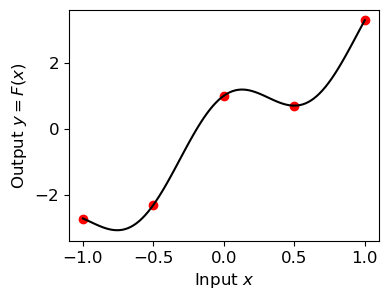

In [58]:
# plot the design points, along with the full function within [-1,1]
fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(x_design, y_design, 'ro', label='Design')
x = np.linspace(-1,1,101)
ax.plot(x, F(x),'k-', label=r'$F(x)$')
ax.set_xlabel(r"Input $x$")
ax.set_ylabel(r"Output $y=F(x)$")

In [59]:
# Train the emulator
kernel = \
    1. * kernels.RBF(
        length_scale=1.,
        length_scale_bounds=(.1,10)
    )  

gp = GPR(kernel=kernel,
    n_restarts_optimizer=5,
    copy_X_train=False)
gp.fit(np.atleast_2d(x_design).T, y_design)
print("C^2 = ", gp.kernel_.get_params()['k1'])
print(gp.kernel_.get_params()['k2'])


C^2 =  2.23**2
RBF(length_scale=0.359)


In [60]:
# A wrapper to make predictions from GP
def predict(x, gp):
    mean, cov = gp.predict(return_cov=True, X=np.atleast_2d(x).T)
    return mean, np.sqrt(np.diag(cov))

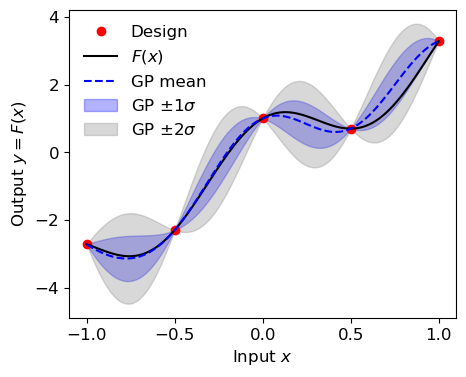

In [62]:
x = np.linspace(-1,1,101)
y, ystd = predict(x, gp)

fig, ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x_design, y_design, 'ro', label='Design')
ax.plot(x, F(x),'k-', label=r'$F(x)$')
ax.plot(x, y,'b--', label=r'GP mean')
ax.fill_between(x, y-ystd, y+ystd, color='b', alpha=.3, label=r'GP $\pm 1\sigma$')
ax.fill_between(x, y-2*ystd, y+2*ystd, color='gray', alpha=.3, label=r'GP $\pm 2\sigma$')
ax.set_xlabel(r"Input $x$")
ax.set_ylabel(r"Output $y=F(x)$")
ax.legend()

Go back to make the prediction range of $x$ larger, `[-2,2]` for instance. Does this Gaussian provide good extrapolation?